In [1]:
MODEL_NAME = 'ResNet'

In [2]:
import numpy as np
import csv
# from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from model import Network, SimpleNET, ResNet

if MODEL_NAME == 'ResNet':
    from config.ResNet_config import *
else:
    from config.baseline_config import *
    
from augmentation import transforms_0
from train import train

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
trainset = datasets.ImageFolder('/dtu/datasets1/02514/hotdog_nothotdog/train', transform=transforms_0)
train_loader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8)

testset = datasets.ImageFolder('/dtu/datasets1/02514/hotdog_nothotdog/test', transform=transforms_0)
test_loader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=8)

In [10]:
if MODEL_NAME == 'ResNet':
    model = eval(MODEL_NAME)(n_features=CONV_SIZE, num_res_blocks=NUM_BLOCKS)
else:
    model = eval(MODEL_NAME)()
    
model.to(device)

loss = nn.BCELoss()
# v1
#optim_sgd = torch.optim.SGD(model.parameters(), lr=0.01, momentum = 0.9)
#optim_adam = torch.optim.Adam(model.parameters(), lr=0.001)
#optim_adagrad = torch.optim.Adagrad(model.parameters(), lr=0.01)
#optim_adadelta = torch.optim.Adadelta(model.parameters())

# v2
#optim_sgd = torch.optim.SGD(model.parameters(), lr=0.1, momentum = 0.9)
#optim_adam = torch.optim.Adam(model.parameters(), lr=0.01)
#optim_adagrad = torch.optim.Adagrad(model.parameters(), lr=0.1)
#optim_adadelta = torch.optim.Adadelta(model.parameters())

# final
optim_sgd = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE*100, momentum = 0.9, weight_decay=1e-2)
optim_adam = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-2)
optim_adamw = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE*10, weight_decay=1e-2)
optim_adadelta = torch.optim.Adadelta(model.parameters(), lr=LEARNING_RATE*1000, weight_decay=1e-2)

#lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=DECAY_RATE)

In [11]:
result_dicts = []
#for optimizer in [optim_sgd, optim_adam, optim_adagrad, optim_adadelta]:
for optimizer in tqdm([optim_sgd, optim_adam, optim_adamw, optim_adadelta], total=4, unit='optimizer'):
    if MODEL_NAME == 'ResNet':
        model = eval(MODEL_NAME)(n_features=CONV_SIZE, num_res_blocks=NUM_BLOCKS)
    else:
        model = eval(MODEL_NAME)()

    model.to(device)
    print(f"Training with {optimizer}")
    optimizer.add_param_group({'params':model.parameters() })
    result_dicts.append(train(model, train_loader, test_loader, loss, optimizer, NUM_EPOCHS))
    

  0%|          | 0/4 [00:00<?, ?optimizer/s]

Training with SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0.01
)


  0%|          | 0/50 [00:00<?, ?epoch/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.685	 test: 0.702	 Accuracy train: 56.9%	 test: 50.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.638	 test: 0.624	 Accuracy train: 64.3%	 test: 69.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.612	 test: 0.613	 Accuracy train: 68.8%	 test: 67.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.607	 test: 0.606	 Accuracy train: 69.5%	 test: 70.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.595	 test: 0.609	 Accuracy train: 70.9%	 test: 70.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.601	 test: 0.634	 Accuracy train: 70.7%	 test: 70.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.583	 test: 0.615	 Accuracy train: 72.4%	 test: 71.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.601	 test: 0.642	 Accuracy train: 70.2%	 test: 70.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.601	 test: 0.621	 Accuracy train: 70.7%	 test: 70.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.579	 test: 0.637	 Accuracy train: 72.5%	 test: 68.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.603	 test: 1.004	 Accuracy train: 68.8%	 test: 48.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.686	 test: 0.691	 Accuracy train: 55.2%	 test: 48.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.686	 test: 0.688	 Accuracy train: 54.3%	 test: 51.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.686	 test: 0.687	 Accuracy train: 54.6%	 test: 52.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.680	 test: 0.690	 Accuracy train: 55.1%	 test: 49.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.664	 test: 0.672	 Accuracy train: 59.9%	 test: 62.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.640	 test: 0.650	 Accuracy train: 65.3%	 test: 71.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.603	 test: 0.633	 Accuracy train: 70.2%	 test: 71.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.605	 test: 0.644	 Accuracy train: 70.2%	 test: 59.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.588	 test: 0.634	 Accuracy train: 71.8%	 test: 71.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.591	 test: 0.582	 Accuracy train: 71.6%	 test: 72.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.582	 test: 0.593	 Accuracy train: 72.2%	 test: 70.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.580	 test: 0.641	 Accuracy train: 72.3%	 test: 61.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.594	 test: 0.623	 Accuracy train: 69.5%	 test: 71.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.592	 test: 0.683	 Accuracy train: 71.5%	 test: 54.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.594	 test: 0.608	 Accuracy train: 70.5%	 test: 67.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.593	 test: 0.621	 Accuracy train: 72.0%	 test: 62.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.586	 test: 0.652	 Accuracy train: 72.1%	 test: 66.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.620	 test: 0.622	 Accuracy train: 68.1%	 test: 67.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.622	 test: 0.611	 Accuracy train: 68.7%	 test: 70.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.615	 test: 0.622	 Accuracy train: 68.6%	 test: 71.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.606	 test: 0.623	 Accuracy train: 69.3%	 test: 71.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.624	 test: 0.645	 Accuracy train: 68.5%	 test: 69.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.683	 test: 0.686	 Accuracy train: 54.6%	 test: 52.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.682	 test: 0.685	 Accuracy train: 54.0%	 test: 51.7%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.690	 test: 0.693	 Accuracy train: 51.8%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.696	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.702	 Accuracy train: 51.9%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.694	 Accuracy train: 51.3%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.683	 test: 0.666	 Accuracy train: 54.2%	 test: 65.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.684	 test: 0.691	 Accuracy train: 55.0%	 test: 53.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.705	 Accuracy train: 51.2%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.693	 Accuracy train: 49.0%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.689	 test: 0.691	 Accuracy train: 52.1%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.656	 test: 0.749	 Accuracy train: 61.9%	 test: 54.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.637	 test: 0.631	 Accuracy train: 65.3%	 test: 67.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.630	 test: 0.647	 Accuracy train: 67.0%	 test: 60.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.626	 test: 0.635	 Accuracy train: 68.2%	 test: 70.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.639	 test: 0.630	 Accuracy train: 65.9%	 test: 68.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.646	 test: 0.627	 Accuracy train: 61.6%	 test: 71.2%
Training with Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.01
)


  0%|          | 0/50 [00:00<?, ?epoch/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.709	 test: 0.703	 Accuracy train: 50.8%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.734	 Accuracy train: 53.6%	 test: 52.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.675	 test: 0.673	 Accuracy train: 57.1%	 test: 63.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.648	 test: 0.637	 Accuracy train: 62.7%	 test: 70.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.599	 test: 22.420	 Accuracy train: 71.8%	 test: 60.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.565	 test: 0.625	 Accuracy train: 74.0%	 test: 70.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.549	 test: 0.588	 Accuracy train: 75.7%	 test: 72.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.526	 test: 0.555	 Accuracy train: 77.0%	 test: 72.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.524	 test: 0.575	 Accuracy train: 76.3%	 test: 71.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.519	 test: 0.554	 Accuracy train: 76.3%	 test: 72.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.514	 test: 0.576	 Accuracy train: 77.2%	 test: 72.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.511	 test: 0.571	 Accuracy train: 77.4%	 test: 69.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.514	 test: 0.545	 Accuracy train: 75.8%	 test: 72.7%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.500	 test: 0.530	 Accuracy train: 77.5%	 test: 74.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.496	 test: 0.544	 Accuracy train: 77.8%	 test: 73.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.496	 test: 0.544	 Accuracy train: 78.3%	 test: 72.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.507	 test: 0.582	 Accuracy train: 77.2%	 test: 71.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.496	 test: 0.546	 Accuracy train: 77.5%	 test: 73.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.481	 test: 0.533	 Accuracy train: 79.2%	 test: 73.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.484	 test: 0.545	 Accuracy train: 78.3%	 test: 72.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.477	 test: 0.541	 Accuracy train: 78.4%	 test: 72.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.485	 test: 0.530	 Accuracy train: 77.7%	 test: 73.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.473	 test: 0.533	 Accuracy train: 78.5%	 test: 73.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.475	 test: 0.528	 Accuracy train: 78.7%	 test: 74.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.470	 test: 0.572	 Accuracy train: 79.2%	 test: 71.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.447	 test: 0.530	 Accuracy train: 80.0%	 test: 73.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.444	 test: 0.541	 Accuracy train: 80.7%	 test: 72.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.445	 test: 0.537	 Accuracy train: 80.6%	 test: 73.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.427	 test: 0.580	 Accuracy train: 81.1%	 test: 72.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.434	 test: 0.540	 Accuracy train: 81.1%	 test: 73.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.402	 test: 0.524	 Accuracy train: 82.7%	 test: 75.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.382	 test: 0.519	 Accuracy train: 84.5%	 test: 74.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.365	 test: 0.534	 Accuracy train: 85.3%	 test: 74.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.379	 test: 0.563	 Accuracy train: 84.5%	 test: 73.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.390	 test: 0.543	 Accuracy train: 83.4%	 test: 74.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.365	 test: 0.528	 Accuracy train: 84.8%	 test: 73.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.362	 test: 0.521	 Accuracy train: 85.0%	 test: 74.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.343	 test: 0.552	 Accuracy train: 85.8%	 test: 72.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.327	 test: 0.535	 Accuracy train: 87.3%	 test: 73.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.369	 test: 0.625	 Accuracy train: 85.6%	 test: 69.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.331	 test: 0.532	 Accuracy train: 86.0%	 test: 73.7%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.295	 test: 0.541	 Accuracy train: 88.2%	 test: 74.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.283	 test: 0.565	 Accuracy train: 89.9%	 test: 75.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.286	 test: 0.556	 Accuracy train: 89.4%	 test: 74.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.266	 test: 0.547	 Accuracy train: 91.0%	 test: 75.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.257	 test: 0.585	 Accuracy train: 91.3%	 test: 74.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.237	 test: 0.624	 Accuracy train: 92.5%	 test: 71.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.242	 test: 0.555	 Accuracy train: 91.4%	 test: 73.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.247	 test: 0.574	 Accuracy train: 91.7%	 test: 72.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.237	 test: 0.532	 Accuracy train: 91.9%	 test: 73.6%
Training with Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0.01
)


  0%|          | 0/50 [00:00<?, ?epoch/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.686	 test: 0.732	 Accuracy train: 56.6%	 test: 49.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.636	 test: 0.642	 Accuracy train: 66.6%	 test: 66.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.638	 test: 0.729	 Accuracy train: 64.5%	 test: 57.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.642	 test: 0.629	 Accuracy train: 63.8%	 test: 69.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.620	 test: 0.740	 Accuracy train: 68.6%	 test: 50.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.632	 test: 0.670	 Accuracy train: 64.9%	 test: 58.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.627	 test: 0.655	 Accuracy train: 65.1%	 test: 61.7%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.609	 test: 0.638	 Accuracy train: 66.8%	 test: 64.7%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.599	 test: 0.616	 Accuracy train: 68.2%	 test: 66.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.611	 test: 0.633	 Accuracy train: 66.8%	 test: 66.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.618	 test: 0.596	 Accuracy train: 66.6%	 test: 70.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.694	 test: 0.761	 Accuracy train: 52.8%	 test: 50.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.705	 test: 0.714	 Accuracy train: 48.2%	 test: 47.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.693	 test: 0.697	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.696	 Accuracy train: 52.0%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.691	 test: 0.698	 Accuracy train: 52.7%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.691	 test: 0.696	 Accuracy train: 52.6%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.690	 test: 0.694	 Accuracy train: 52.5%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.689	 test: 0.696	 Accuracy train: 53.0%	 test: 48.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.689	 test: 0.694	 Accuracy train: 54.8%	 test: 49.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.689	 test: 0.696	 Accuracy train: 53.9%	 test: 48.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.687	 test: 0.692	 Accuracy train: 54.9%	 test: 49.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.687	 test: 0.690	 Accuracy train: 53.5%	 test: 52.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.689	 test: 0.692	 Accuracy train: 52.6%	 test: 58.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.690	 test: 0.695	 Accuracy train: 53.4%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.688	 test: 0.692	 Accuracy train: 53.1%	 test: 49.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.686	 test: 0.694	 Accuracy train: 54.3%	 test: 50.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.687	 test: 0.689	 Accuracy train: 53.2%	 test: 56.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.689	 test: 0.692	 Accuracy train: 51.1%	 test: 51.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.690	 test: 0.692	 Accuracy train: 53.3%	 test: 51.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.690	 test: 0.697	 Accuracy train: 52.1%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.690	 test: 0.708	 Accuracy train: 53.6%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.687	 test: 0.701	 Accuracy train: 54.1%	 test: 48.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.688	 test: 0.710	 Accuracy train: 55.2%	 test: 48.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.687	 test: 0.689	 Accuracy train: 53.2%	 test: 61.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.687	 test: 0.687	 Accuracy train: 54.5%	 test: 55.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.687	 test: 0.687	 Accuracy train: 54.5%	 test: 54.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.687	 test: 0.694	 Accuracy train: 53.5%	 test: 49.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.687	 test: 0.702	 Accuracy train: 55.2%	 test: 48.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.687	 test: 0.687	 Accuracy train: 54.4%	 test: 58.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.686	 test: 0.686	 Accuracy train: 55.6%	 test: 63.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.683	 test: 0.690	 Accuracy train: 55.7%	 test: 52.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.681	 test: 0.761	 Accuracy train: 58.7%	 test: 48.7%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.675	 test: 0.684	 Accuracy train: 58.0%	 test: 52.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.673	 test: 0.664	 Accuracy train: 58.6%	 test: 67.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.662	 test: 0.636	 Accuracy train: 63.6%	 test: 68.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.632	 test: 0.627	 Accuracy train: 66.6%	 test: 65.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.639	 test: 0.678	 Accuracy train: 64.0%	 test: 67.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.630	 test: 0.613	 Accuracy train: 66.0%	 test: 70.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.622	 test: 0.640	 Accuracy train: 68.2%	 test: 66.8%
Training with Adadelta (
Parameter Group 0
    differentiable: False
    eps: 1e-06
    foreach: None
    lr: 1.0
    maximize: False
    rho: 0.9
    weight_decay: 0.01
)


  0%|          | 0/50 [00:00<?, ?epoch/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.684	 test: 0.664	 Accuracy train: 55.3%	 test: 64.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.626	 test: 0.608	 Accuracy train: 68.2%	 test: 69.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.602	 test: 0.597	 Accuracy train: 71.7%	 test: 69.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.583	 test: 0.580	 Accuracy train: 71.2%	 test: 72.7%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.565	 test: 0.592	 Accuracy train: 73.9%	 test: 67.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.572	 test: 0.587	 Accuracy train: 72.5%	 test: 69.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.575	 test: 0.588	 Accuracy train: 72.6%	 test: 69.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.549	 test: 0.573	 Accuracy train: 74.7%	 test: 71.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.524	 test: 0.592	 Accuracy train: 75.4%	 test: 66.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.513	 test: 0.600	 Accuracy train: 76.5%	 test: 64.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.494	 test: 0.597	 Accuracy train: 78.0%	 test: 68.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.493	 test: 0.612	 Accuracy train: 77.7%	 test: 69.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.462	 test: 0.581	 Accuracy train: 78.7%	 test: 71.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.447	 test: 0.582	 Accuracy train: 80.1%	 test: 69.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.419	 test: 0.614	 Accuracy train: 82.0%	 test: 70.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.424	 test: 0.573	 Accuracy train: 81.1%	 test: 69.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.395	 test: 0.711	 Accuracy train: 83.9%	 test: 68.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.351	 test: 0.654	 Accuracy train: 85.4%	 test: 64.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.329	 test: 0.619	 Accuracy train: 87.2%	 test: 68.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.310	 test: 0.637	 Accuracy train: 87.9%	 test: 65.7%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.279	 test: 0.861	 Accuracy train: 89.9%	 test: 67.3%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.239	 test: 0.765	 Accuracy train: 91.6%	 test: 61.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.220	 test: 0.689	 Accuracy train: 93.3%	 test: 63.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.221	 test: 0.675	 Accuracy train: 93.0%	 test: 64.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.189	 test: 0.675	 Accuracy train: 93.7%	 test: 65.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.183	 test: 0.833	 Accuracy train: 94.1%	 test: 59.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.191	 test: 0.769	 Accuracy train: 93.5%	 test: 63.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.180	 test: 0.750	 Accuracy train: 95.1%	 test: 62.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.171	 test: 0.750	 Accuracy train: 94.6%	 test: 63.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.153	 test: 0.797	 Accuracy train: 95.7%	 test: 66.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.139	 test: 0.740	 Accuracy train: 96.1%	 test: 62.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.161	 test: 0.792	 Accuracy train: 94.8%	 test: 60.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.165	 test: 0.927	 Accuracy train: 94.7%	 test: 55.7%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.146	 test: 0.743	 Accuracy train: 95.7%	 test: 65.7%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.129	 test: 0.927	 Accuracy train: 96.8%	 test: 65.9%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.149	 test: 0.891	 Accuracy train: 95.5%	 test: 64.0%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.154	 test: 0.802	 Accuracy train: 94.5%	 test: 65.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.125	 test: 0.731	 Accuracy train: 96.8%	 test: 63.6%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.143	 test: 0.769	 Accuracy train: 95.8%	 test: 64.4%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.123	 test: 0.758	 Accuracy train: 96.8%	 test: 64.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.126	 test: 0.807	 Accuracy train: 96.6%	 test: 65.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.116	 test: 0.896	 Accuracy train: 97.1%	 test: 64.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.129	 test: 0.790	 Accuracy train: 96.4%	 test: 66.8%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.114	 test: 0.780	 Accuracy train: 96.9%	 test: 65.1%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.107	 test: 0.733	 Accuracy train: 97.2%	 test: 64.7%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.115	 test: 0.684	 Accuracy train: 97.2%	 test: 65.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.102	 test: 0.684	 Accuracy train: 97.7%	 test: 67.5%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.113	 test: 0.757	 Accuracy train: 97.4%	 test: 64.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.108	 test: 0.721	 Accuracy train: 97.4%	 test: 69.2%


  0%|          | 0/32 [00:00<?, ?it/s]

Loss train: 0.117	 test: 0.727	 Accuracy train: 96.7%	 test: 69.4%


In [12]:
# saving results
optim_names = ["SGD", "Adam", "AdamW", "Adadelta"]
for i, optim_dict in enumerate(result_dicts):
    suffix = "final_v4"
    d = optim_dict
    if MODEL_NAME == 'ResNet':
        filename = f'results/{MODEL_NAME}/{CONV_SIZE}_kernel_{NUM_BLOCKS}_blocks_{NUM_EPOCHS}_epochs_{LEARNING_RATE:.0e}_lr_{optim_names[i]}_optim_{suffix}.csv'
    else:
        filename = f'results/{MODEL_NAME}/{NUM_EPOCHS}_epochs_{LEARNING_RATE:.0e}_lr_{optim_names[i]}_optim_{suffix}.csv'
    with open(filename, 'w') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerow(d.keys())
        writer.writerows(zip(*d.values()))

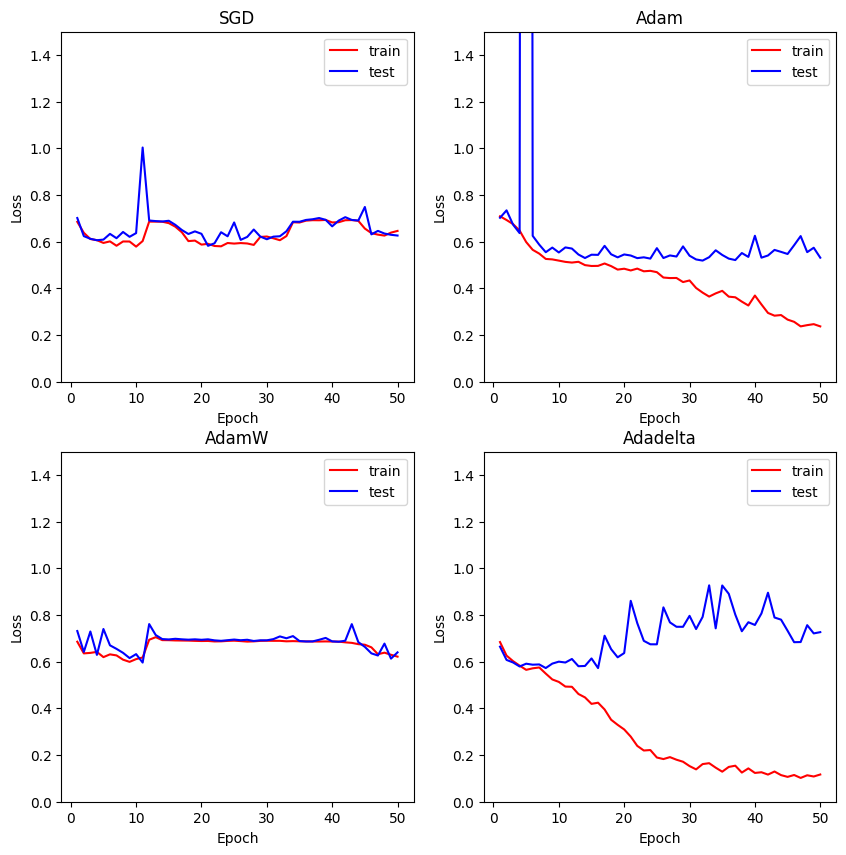

In [17]:
i = 0
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 10), sharey=False)
axs = [ax1, ax2, ax3, ax4]
for i, optim_dict in enumerate(result_dicts):
    axs[i].plot([e for e in range(1, NUM_EPOCHS+1)], optim_dict['train_loss'], c='r', label='train')
    axs[i].plot([e for e in range(1, NUM_EPOCHS+1)], optim_dict['test_loss'], c='b', label='test')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('Loss')
    axs[i].set_ylim([0,1.5])
    axs[i].set_title(optim_names[i])
    axs[i].legend()

plt.savefig('optim_comparison_lr=varying_final_v4.png')
plt.show()


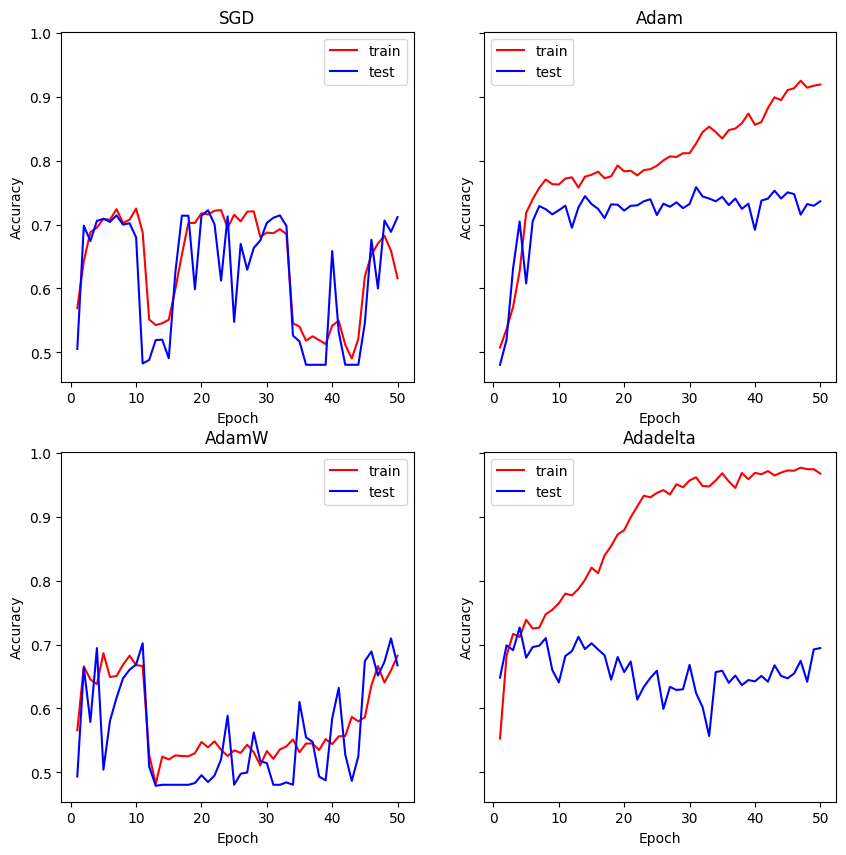

In [14]:
i = 0
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 10), sharey=True)
axs = [ax1, ax2, ax3, ax4]
for i, optim_dict in enumerate(result_dicts):
    axs[i].plot([e for e in range(1, NUM_EPOCHS+1)], optim_dict['train_acc'], c='r', label='train')
    axs[i].plot([e for e in range(1, NUM_EPOCHS+1)], optim_dict['test_acc'], c='b', label='test')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('Accuracy')
    axs[i].set_title(optim_names[i])
    axs[i].legend()

plt.savefig('optim_comparison_accuracy_lr=varying_final_v3.png')
plt.show()